Epoch 1/10, Loss: 0.4930578589017455
Number of epochs: 10
Train Accuracy: 1.0
Test Accuracy: 1.0


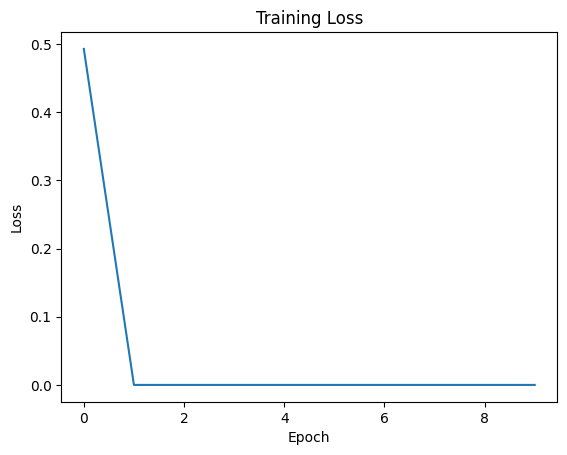

In [1]:
import numpy as np
import json
from PIL import Image
import os
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
def load_data(data_dir, annotation_file, allowed_extensions):
    images = []
    labels = []
    with open(annotation_file, "r") as f:
        data = json.load(f)
        for image_info in data["images"]:
            file_name = image_info["file_name"]
            if file_name.lower().endswith(allowed_extensions):
                image_path = os.path.join(data_dir, file_name)
                images.append(np.array(Image.open(image_path).resize((224, 224))))  # Resize images to a fixed size
                # Check if the image has weeds (assuming binary classification)
                label = 0
                for category_id in image_info.get("categories", []):
                    if category_id == 1:  # Assuming category_id 1 corresponds to weeds
                        label = 1
                        break
                labels.append(label)
    return np.array(images), np.array(labels)

allowed_extensions = ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

train_images, train_labels = load_data("./A/train", "./A/train/_annotations.coco.json", allowed_extensions)
test_images, test_labels = load_data("./A/test", "./A/test/_annotations.coco.json", allowed_extensions)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 2: Model Architecture (ANN from scratch)
class NeuralNetwork:
    def __init__(self):
        self.weights = np.random.randn(224*224*3, 1) * 0.01  # Initialize weights closer to zero
        self.bias = 0

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute loss
            loss = -np.mean(y * np.log(y_pred.clip(min=1e-10)) + (1 - y) * np.log((1 - y_pred).clip(min=1e-10)))
            loss_history.append(loss)
            
            # Backpropagation
            dw = np.dot(X.T, (y_pred - y)) / len(X)
            db = np.mean(y_pred - y)
            
            # Update weights anSd bias
            self.weights -= learning_rate * dw.reshape(self.weights.shape)
            self.bias -= learning_rate * db
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

        return loss_history

# Reshape images for ANN input
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Create and train the model
model = NeuralNetwork()
loss_history = model.train(train_images_flat, train_labels.reshape(-1, 1), epochs=10, learning_rate=0.01)

# Ensure the loop runs for all epochs
print("Number of epochs:", len(loss_history))

# Step 4: Evaluation
train_predictions = model.predict(train_images_flat)
test_predictions = model.predict(test_images_flat)

train_accuracy = np.mean((train_predictions >= 0.5) == train_labels)
test_accuracy = np.mean((test_predictions >= 0.5) == test_labels)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Step 5: Results Analysis
# Plot loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


Visualizing for better understanding

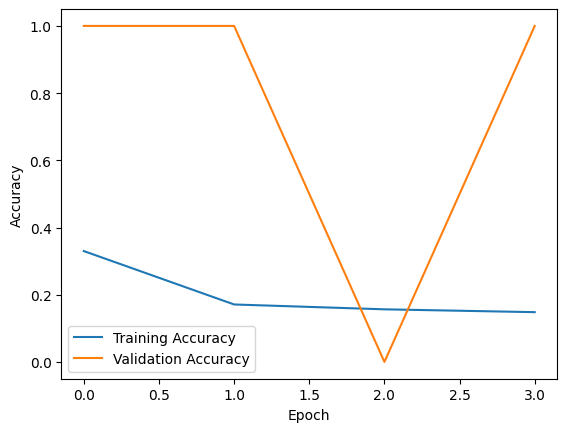

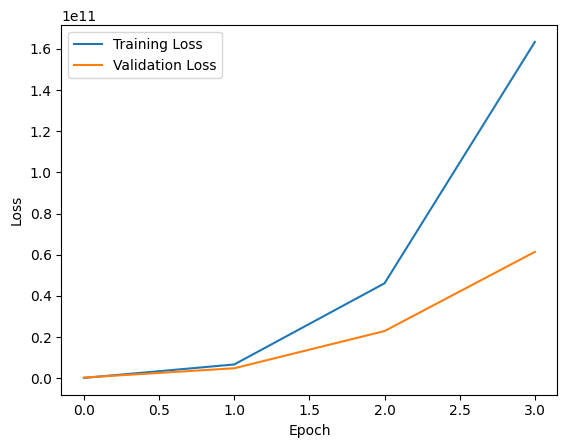

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()